In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import building1retail.csv. Show the first 5 records

data = pd.read_csv('input/building1retail.csv')
data.head()

Timestamp  OAT (F)  Power (kW)
0  1/1/2010 1:15       51       165.1
1  1/1/2010 1:30       51       151.6
2  1/1/2010 1:45       51       146.9
3  1/1/2010 2:00       51       153.7
4  1/1/2010 2:15       51       153.8

In [3]:
# Convert the type of Timestamp from 'object' to 'datetime'. This will change the format of Timestamp
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%Y %H:%M')
data.head()

Timestamp  OAT (F)  Power (kW)
0 2010-01-01 01:15:00       51       165.1
1 2010-01-01 01:30:00       51       151.6
2 2010-01-01 01:45:00       51       146.9
3 2010-01-01 02:00:00       51       153.7
4 2010-01-01 02:15:00       51       153.8

In [4]:
# Convert the type of to String
data['Timestamp'] = data['Timestamp'].astype(str)
data.head()

Timestamp  OAT (F)  Power (kW)
0  2010-01-01 01:15:00       51       165.1
1  2010-01-01 01:30:00       51       151.6
2  2010-01-01 01:45:00       51       146.9
3  2010-01-01 02:00:00       51       153.7
4  2010-01-01 02:15:00       51       153.8

In [5]:
# Give the dimensions of the dataset
data.shape

(34940, 3)

In [6]:
# Drop the rows that have columns with no available data
data = data.dropna()

In [7]:
# Give the dimensions of the dataset
data.shape

(34940, 3)

In [8]:
# Give the statistics of the dataset
data.describe()

OAT (F)    Power (kW)
count  34940.000000  34940.000000
mean      58.585690    261.644659
std        8.739352     65.673392
min       33.000000      0.000000
25%       53.000000    194.600000
50%       58.000000    276.700000
75%       64.000000    312.300000
max      100.000000    457.900000

In [9]:
# You can see that the minimum value of Power (kW) is 0.0
# Calculate the mean and the standard deviation for Power (kW)
meanPower = data['Power (kW)'].mean()
stdPower = data['Power (kW)'].std()

print(meanPower)
print(stdPower)

261.6446594161415
65.67339168302733


In [10]:
# The 68-95-99.7 - rule in mind: drop all values that are more than 3 standard deviations from the mean
data = data[(data['Power (kW)'] >= (meanPower - 3 * stdPower)) & (data['Power (kW)'] <= (meanPower + 3 * stdPower))]

In [11]:
# Give the dimensions of the dataset
data.shape

(34913, 3)

In [12]:
# Give the statistics of the dataset
data.describe()

OAT (F)    Power (kW)
count  34913.000000  34913.000000
mean      58.587460    261.844313
std        8.742201     65.304108
min       33.000000     96.900000
25%       53.000000    194.700000
50%       58.000000    276.800000
75%       64.000000    312.400000
max      100.000000    457.900000

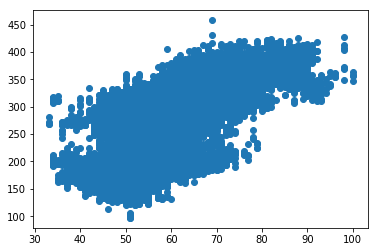

In [13]:
# Plot the Power (kW) versus the OAT (F)
plt.scatter(data['OAT (F)'], data['Power (kW)'])

In [14]:
# The Power is highly dependent on the time of day. 
# We will use this information to incorporate it into our regression model.
# Add an extra column Month. The month has the integer value of the month (e.g. not 01, but 1)
data['Month'] = data['Timestamp'].str[5:7].astype(int)
data.head()

Timestamp  OAT (F)  Power (kW)  Month
0  2010-01-01 01:15:00       51       165.1      1
1  2010-01-01 01:30:00       51       151.6      1
2  2010-01-01 01:45:00       51       146.9      1
3  2010-01-01 02:00:00       51       153.7      1
4  2010-01-01 02:15:00       51       153.8      1

In [15]:
# Add an extra column Day. The day has the integer value of the day (e.g. not 01, but 1)
data['Day'] = data['Timestamp'].str[8:10].astype(int)
data.head()

Timestamp  OAT (F)  Power (kW)  Month  Day
0  2010-01-01 01:15:00       51       165.1      1    1
1  2010-01-01 01:30:00       51       151.6      1    1
2  2010-01-01 01:45:00       51       146.9      1    1
3  2010-01-01 02:00:00       51       153.7      1    1
4  2010-01-01 02:15:00       51       153.8      1    1

In [16]:
# Add an extra column Hour. The Hour has the integer value of the hour (e.g. not 01, but 1)
data['Hour'] = data['Timestamp'].str[11:13].astype(int)
data.head()

Timestamp  OAT (F)  Power (kW)  Month  Day  Hour
0  2010-01-01 01:15:00       51       165.1      1    1     1
1  2010-01-01 01:30:00       51       151.6      1    1     1
2  2010-01-01 01:45:00       51       146.9      1    1     1
3  2010-01-01 02:00:00       51       153.7      1    1     2
4  2010-01-01 02:15:00       51       153.8      1    1     2

In [17]:
# Select the data of 1 specific day (e.g. 2010-03-04)
day = data[data['Timestamp'].str[0:10] == '2010-03-04']
day.head()

Timestamp  OAT (F)  Power (kW)  Month  Day  Hour
5947  2010-03-04 00:00:00       45       164.2      3    4     0
5948  2010-03-04 00:15:00       44       164.2      3    4     0
5949  2010-03-04 00:30:00       44       160.7      3    4     0
5950  2010-03-04 00:45:00       44       174.0      3    4     0
5951  2010-03-04 01:00:00       44       186.2      3    4     1

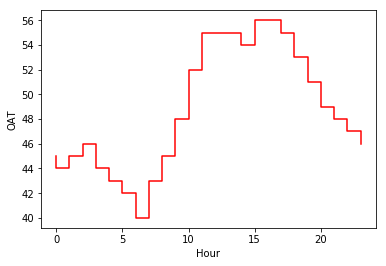

In [18]:
# Plot the OAT (F) versus the Hour of day
plt.plot(day['Hour'], day['OAT (F)'], color='red')
plt.xlabel('Hour')
plt.ylabel('OAT')

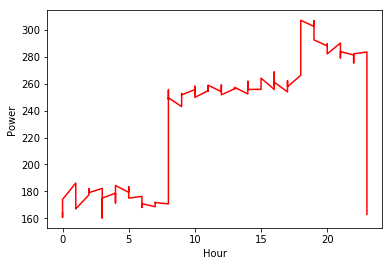

In [19]:
# Plot the Power (kW) versus the Hour of day
plt.plot(day['Hour'], day['Power (kW)'], color='red')
plt.xlabel('Hour')
plt.ylabel('Power')

In [20]:
# Use RandomForestRegressor to predict the Power (kW)
from sklearn.model_selection import train_test_split
X = data.drop(['Timestamp','Power (kW)'],axis=1)
y = data['Power (kW)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
# create dictionary of models
modeldict = {'modelForest25':RandomForestRegressor(n_estimators=25),\
             'modelForest50':RandomForestRegressor(n_estimators=50),\
             'modelForest100':RandomForestRegressor(n_estimators=100),\
             'modelForest150':RandomForestRegressor(n_estimators=150),\
             'modelForest200':RandomForestRegressor(n_estimators=200),\
             'modelForest250':RandomForestRegressor(n_estimators=250)}
# initialize MAE by choosing a high value
MAE = 100000
# initialize bestmodel
bestmodel = 'modelForest25'

for modelkey in modeldict:
    model = modeldict[modelkey]

    model.fit(X_train,y_train)

    y_predict = model.predict(X_test)

    NEWMAE = mean_absolute_error(y_test,y_predict)
    if NEWMAE < MAE: 
        MAE = NEWMAE
        bestmodel = modelkey

print('Bestmodel: ' + modelkey)
print('Mean Absolute Error: '+ str(MAE))
r2 = r2_score(y_test,y_predict)
print('R square: ' + str(r2))        
       

Bestmodel: modelForest250
Mean Absolute Error: 9.716091003283454
R square: 0.9322121806903251
